# Metadata

```yaml
Course:   DS 5001
Module:   06 6 Lab
Topic:    Similarity and Distance Measures
Author:   R.C.Alvarado
Date:     19 February 2023 (revised)
```

# Set Up

## Config

In [1]:
data_in = "../data/output"
data_out = "../data/output"
data_prefix = 'austen-melville'

In [2]:
OHCO = ['book_id', 'chap_num']

In [3]:
colors = "YlGnBu"

## Import

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns; sns.set()

In [6]:
from numpy.linalg import norm
from scipy.spatial.distance import pdist

In [7]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Prepare the Data

## Import tables

In [8]:
BOW = pd.read_csv(f"{data_in}/{data_prefix}-BOW.csv").set_index(OHCO+['term_str'])
LIB = pd.read_csv(f'{data_in}/{data_prefix}-LIB.csv').set_index('book_id')

Add back a row to LIB that was removed earlier.

In [9]:
LIB.loc[53861, 'title'] = 'THE APPLE TREE TABLE AND OTHER SKETCHES'
LIB.loc[53861, 'author'] = 'MELVILLE, HERMAN'
LIB.loc[53861, 'book_len'] = BOW.loc[53861].n.sum()

In [116]:
# LIB

Add label for visualizations

In [11]:
LIB['label'] = LIB.author.str.split(', ').str[0] + ': ' +  LIB.title.str[:20] + ' (' + LIB.index.astype('str') + ')'
LIB['label'] = LIB.label.str.title()

In [12]:
LIB.label

book_id
105                    Austen: Persuasion (105)
121              Austen: Northanger Abbey (121)
141                Austen: Mansfield Park (141)
158                          Austen: Emma (158)
161          Austen: Sense And Sensibilit (161)
946                    Austen: Lady Susan (946)
1212        Austen: Love And Freindship  (1212)
1342         Austen: Pride And Prejudice (1342)
1900      Melville: Typee A Romance Of T (1900)
2701      Melville: Moby Dick Or The Wha (2701)
4045      Melville: Omoo Adventures In T (4045)
8118      Melville: Redburn His First Vo (8118)
10712    Melville: White Jacket Or The  (10712)
13720    Melville: Mardi And A Voyage T (13720)
13721    Melville: Mardi And A Voyage T (13721)
15422    Melville: Israel Potter His Fi (15422)
15859        Melville: The Piazza Tales (15859)
21816    Melville: The Confidence Man H (21816)
34970    Melville: Pierre Or The Ambigu (34970)
53861    Melville: The Apple Tree Table (53861)
Name: label, dtype: object

## Get TFIDF Matrix


Even though we already computed TFIDF in our imported BOW, we recreate it here.

In [13]:
# TFIDF_CHAP = BOW.tfidf.unstack(fill_value=0)

In [14]:
# TFIDF_CHAP

In [15]:
get_tfidf = lambda X, agg_func='sum': (X.T / X.T.agg(agg_func)).T * (np.log2(len(X)/X.astype('bool').sum()))

In [16]:
TFIDF_CHAP = get_tfidf(BOW.n.unstack(fill_value=0))

In [17]:
TFIDF_CHAP

term_str            0         1   10  100  1000  10000   1000000  10000000  \
book_id chap_num                                                             
105     1         0.0  0.005084  0.0  0.0   0.0    0.0  0.000000       0.0   
        2         0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        3         0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        4         0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        5         0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
...               ...       ...  ...  ...   ...    ...       ...       ...   
53861   8         0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        11        0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        13        0.0  0.000000  0.0  0.0   0.0    0.0  0.004648       0.0   
        14        0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   
        15        0.0  0.000000  0.0  0.0   0.0    0.0  0.000000       0.0   

term_str          10440  10800  ...  zoroaster  zozo  zuma  zur    à  æneas  \
book_id chap_num                ...                                           
105     1           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        2           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        3           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        4           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        5           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
...                 ...    ...  ...        ...   ...   ...  ...  ...    ...   
53861   8           0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        11          0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        13          0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        14          0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   
        15          0.0    0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0   

term_str          æniad  æson  æsops  ł20000  
book_id chap_num                              
105     1           0.0   0.0    0.0     0.0  
        2           0.0   0.0    0.0     0.0  
        3           0.0   0.0    0.0     0.0  
        4           0.0   0.0    0.0     0.0  
        5           0.0   0.0    0.0     0.0  
...                 ...   ...    ...     ...  
53861   8           0.0   0.0    0.0     0.0  
        11          0.0   0.0    0.0     0.0  
        13          0.0   0.0    0.0     0.0  
        14          0.0   0.0    0.0     0.0  
        15          0.0   0.0    0.0     0.0  

[1122 rows x 40478 columns]

## Collapse Bags

We want to work with larger bags in this notebook, in order to better visualize our resulting clusters.

Note that this is not the same as beginning with book as the bag! We are getting aggregate TFIDF for chapters.

In [18]:
TFIDF = TFIDF_CHAP.groupby(OHCO[:1]).sum()

In [19]:
TFIDF

term_str,0,1,10,100,1000,10000,1000000,10000000,10440,10800,...,zoroaster,zozo,zuma,zur,à,æneas,æniad,æson,æsops,ł20000
book_id,,,,,,,,,,,,,,,,,,,,,
105,0.00000,0.005084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
121,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
141,0.00000,0.000000,0.007691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.002243
158,0.00000,0.000000,0.000000,0.000000,0.000000,0.011089,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
161,0.00000,0.002349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
946,0.00000,0.000000,0.011205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1212,0.00259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1342,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1900,0.00000,0.000000,0.002637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


## Create Normalized Tables

We normalize TFIDF values in various ways. Normalizations types are required for certain distance measures.

In [20]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean / Euclidean

## Create Doc Pair Table

Create a table to store our results.

Note that `pist()` is a "distance matrix computation from a collection of raw observation vectors stored in a rectangular array".

In [21]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [22]:
PAIRS.shape

(190, 0)

In [23]:
PAIRS.head()

Empty DataFrame
Columns: []
Index: [(105, 121), (105, 141), (105, 158), (105, 161), (105, 946)]

## Compute Distances

In [24]:
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')

In [25]:
PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')  
# PAIRS['euclidean2'] = pdist(L2, 'euclidean') # Should be the same as cosine (colinear)

In [26]:
PAIRS.head().style.background_gradient(colors)

## Compare Distributions

In [27]:
SAMPLE = PAIRS.sample(1000) if PAIRS.shape[0] > 1000 else PAIRS

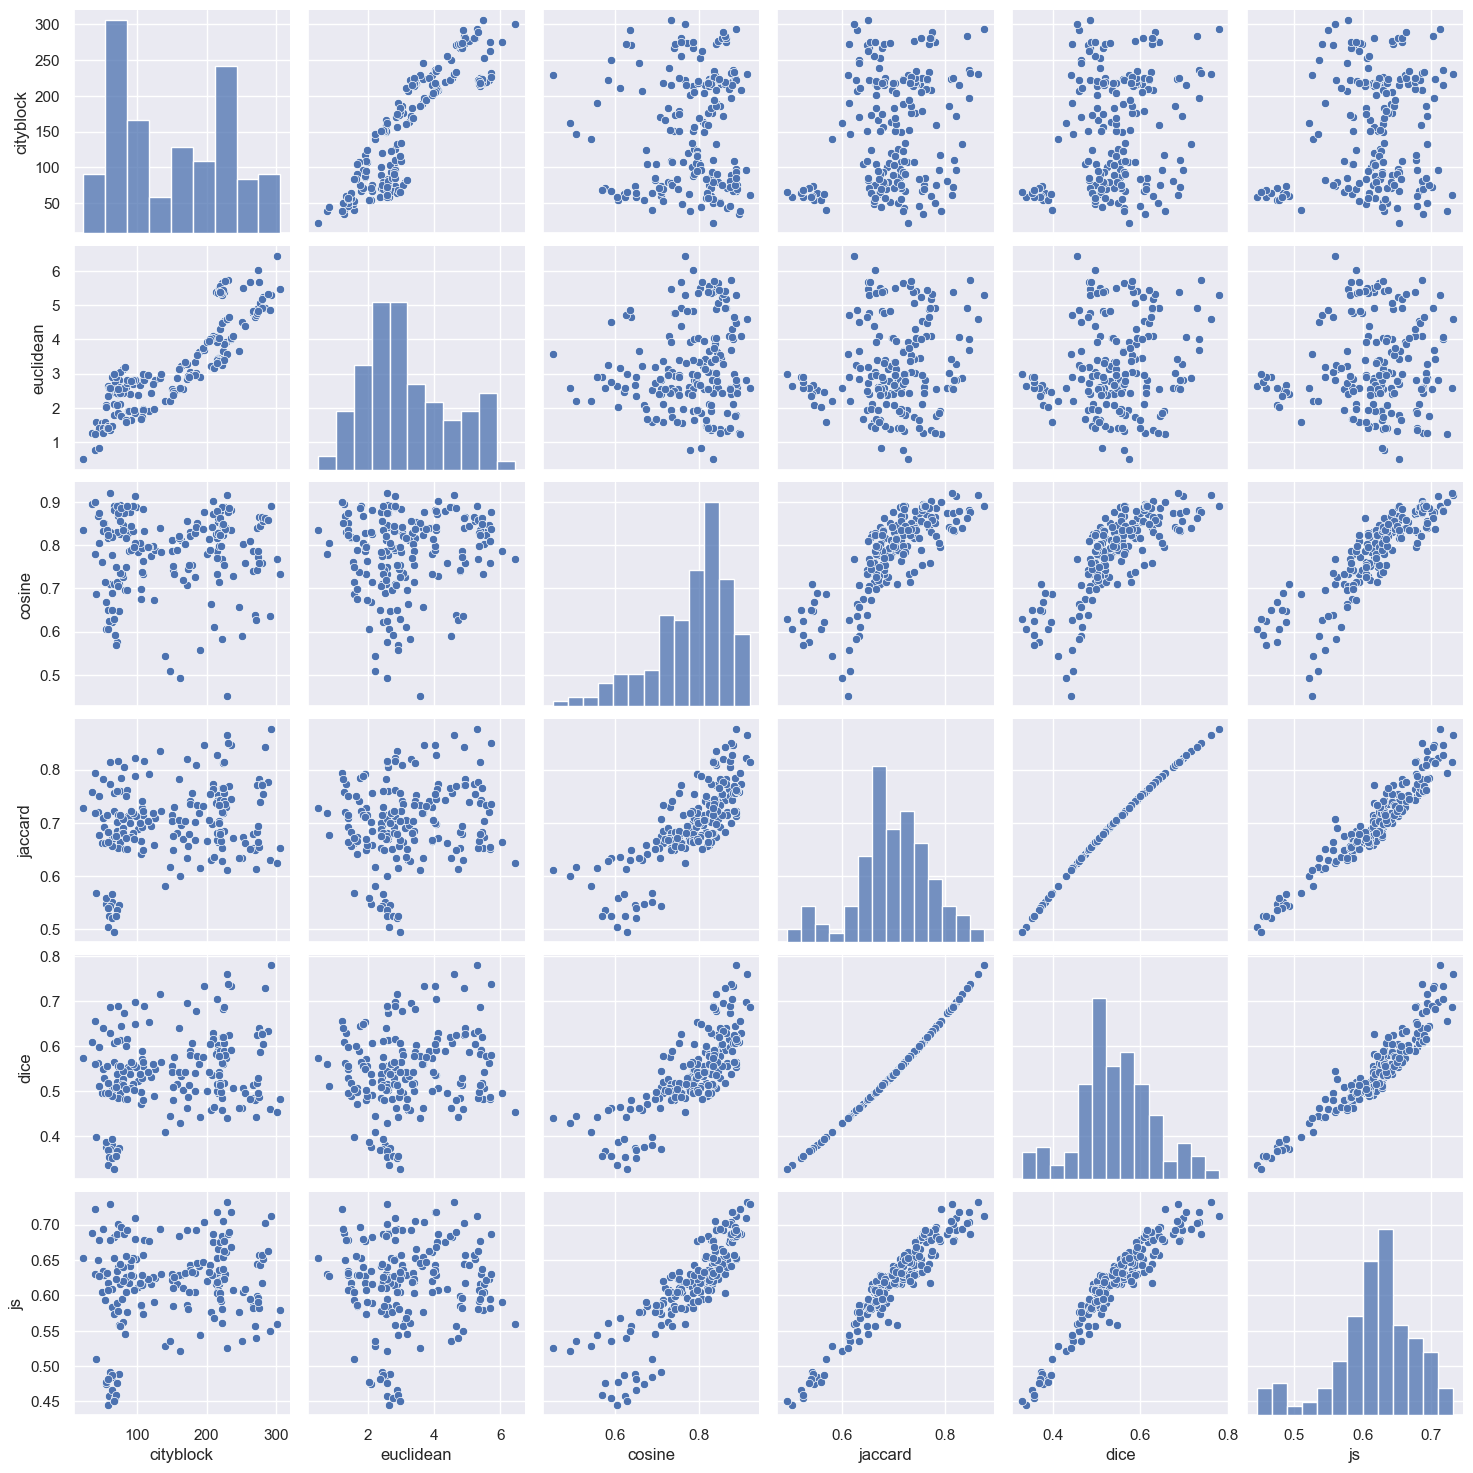

In [28]:
sns.pairplot(SAMPLE);

In [29]:
PAIRS.sort_values('cosine').head(20).style.background_gradient(colors)

,,cityblock,euclidean,cosine,jaccard,dice,js
doc_a,doc_b,,,,,,
13720,13721,228.713876,3.568547,0.451386,0.611127,0.440017,0.525270
8118,10712,161.524741,2.568429,0.492472,0.600236,0.428813,0.520799
4045,8118,146.948510,2.200206,0.507745,0.616342,0.445444,0.535058
1900,4045,139.279879,2.206917,0.542518,0.581559,0.409999,0.527811
4045,10712,190.296509,2.896403,0.558323,0.614213,0.443223,0.544416
158,1342,68.965456,2.902290,0.569072,0.525485,0.356378,0.459042
121,1342,70.969401,2.564696,0.575981,0.536637,0.366715,0.475328
4045,13720,221.667656,3.257793,0.584068,0.628488,0.458245,0.560436
2701,8118,250.393178,4.504027,0.590996,0.632841,0.462887,0.535405


# Create Clusters

## Hiearchical

In [111]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = LIB.label.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

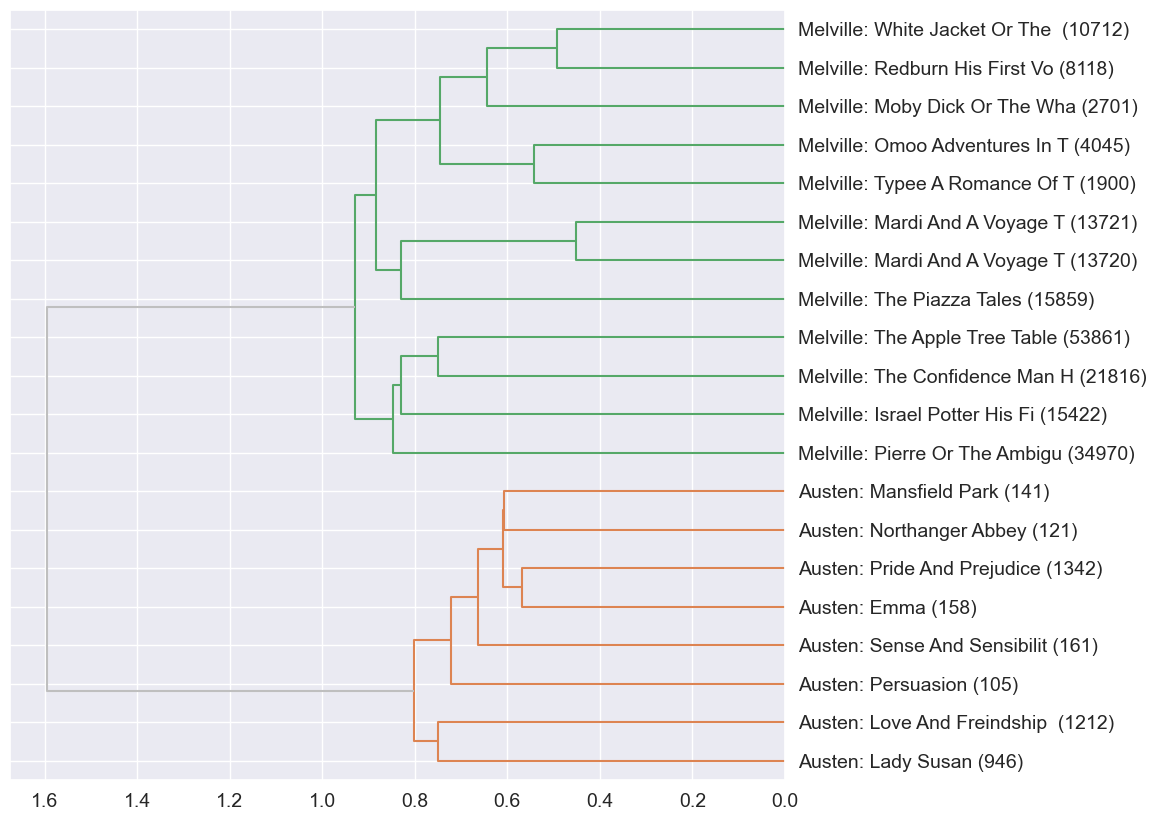

In [112]:
hca(PAIRS.cosine, linkage_method='ward', color_thresh=1)

<Figure size 640x480 with 0 Axes>

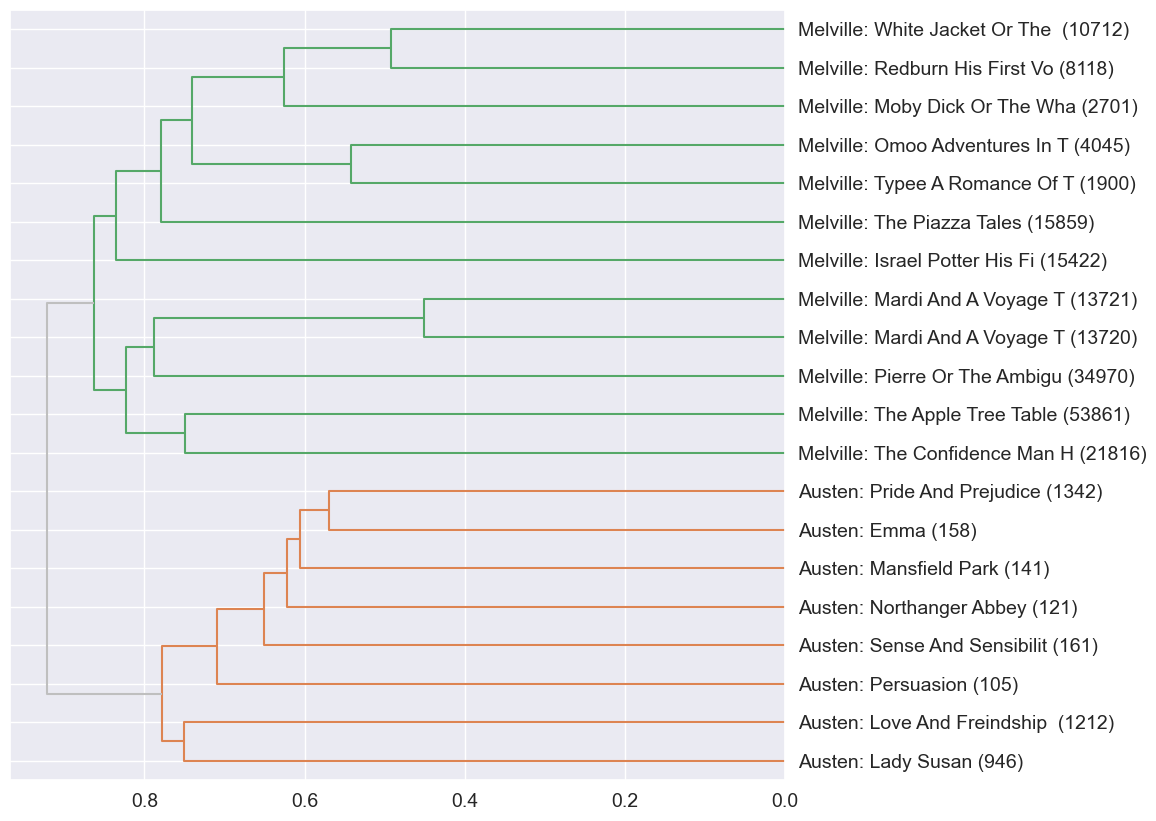

In [32]:
hca(PAIRS.cosine, linkage_method='complete', color_thresh=.9);

<Figure size 640x480 with 0 Axes>

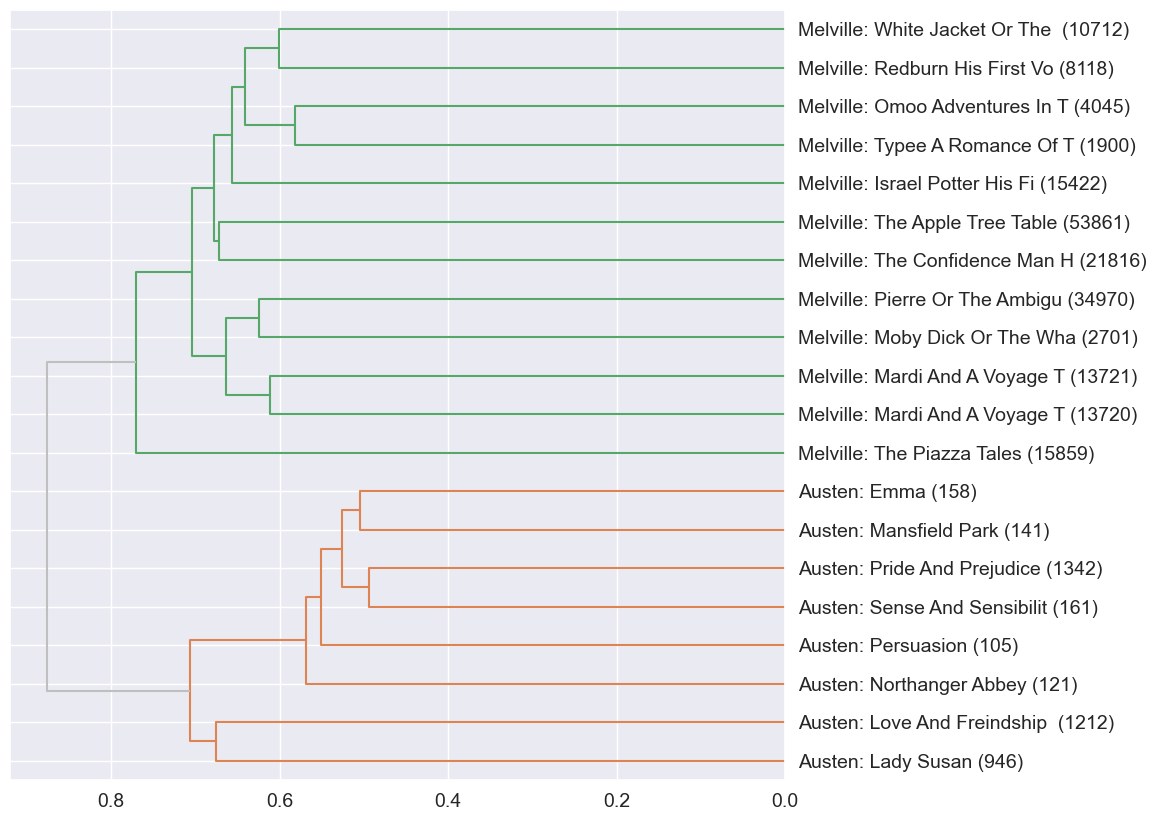

In [33]:
hca(PAIRS.jaccard, color_thresh=.8);

<Figure size 640x480 with 0 Axes>

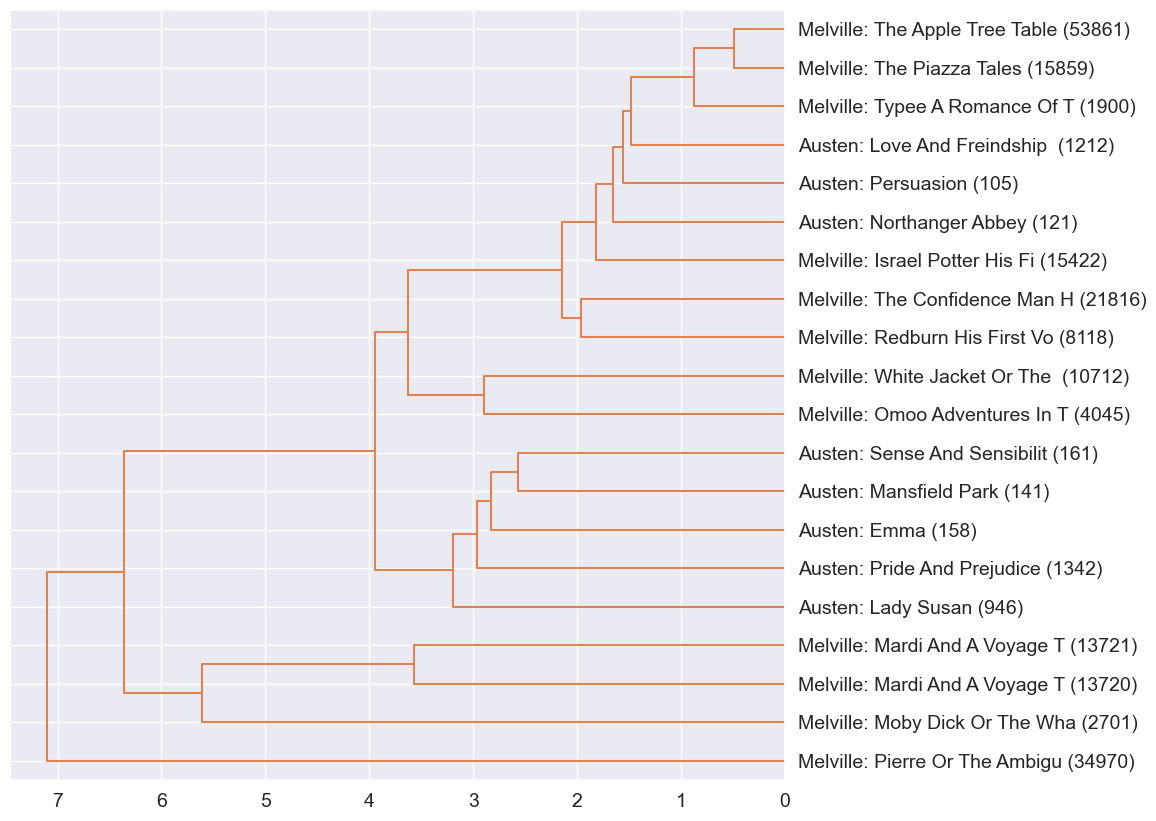

In [34]:
hca(PAIRS.euclidean, linkage_method='ward', color_thresh=80);

<Figure size 640x480 with 0 Axes>

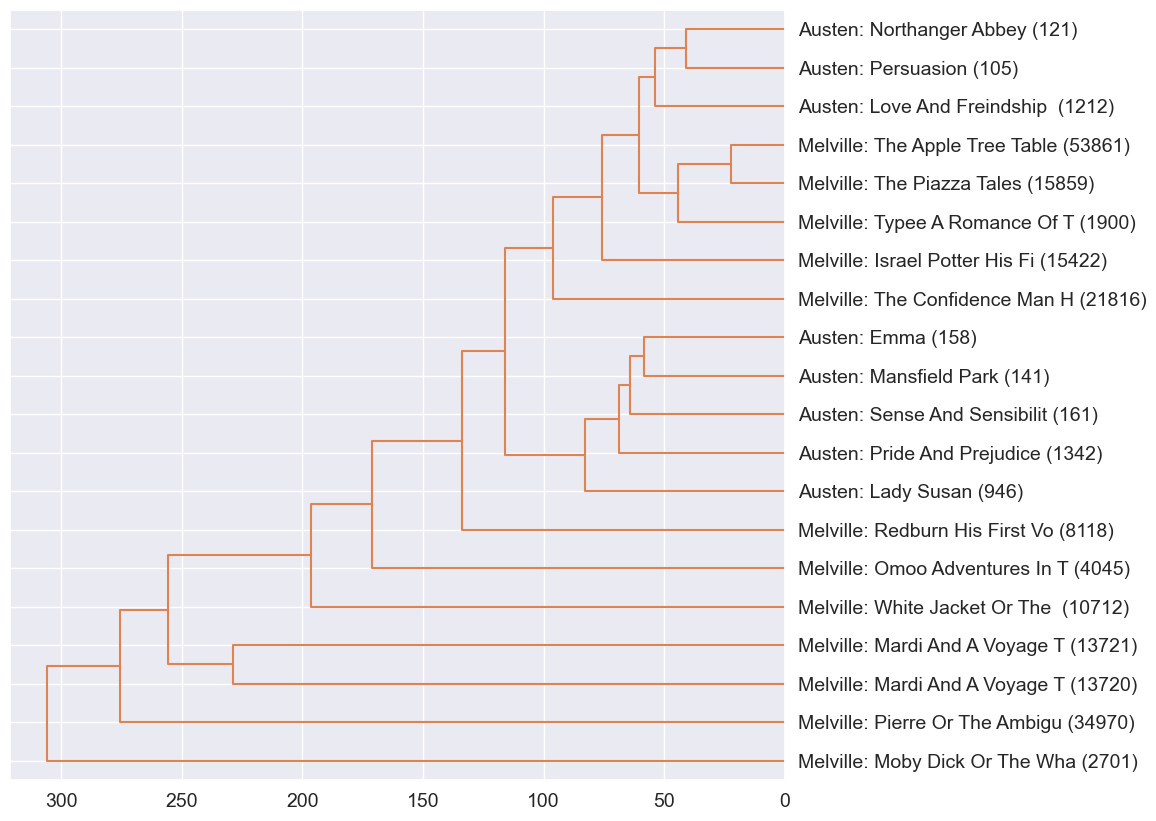

In [35]:
hca(PAIRS.cityblock, color_thresh=1300);

<Figure size 640x480 with 0 Axes>

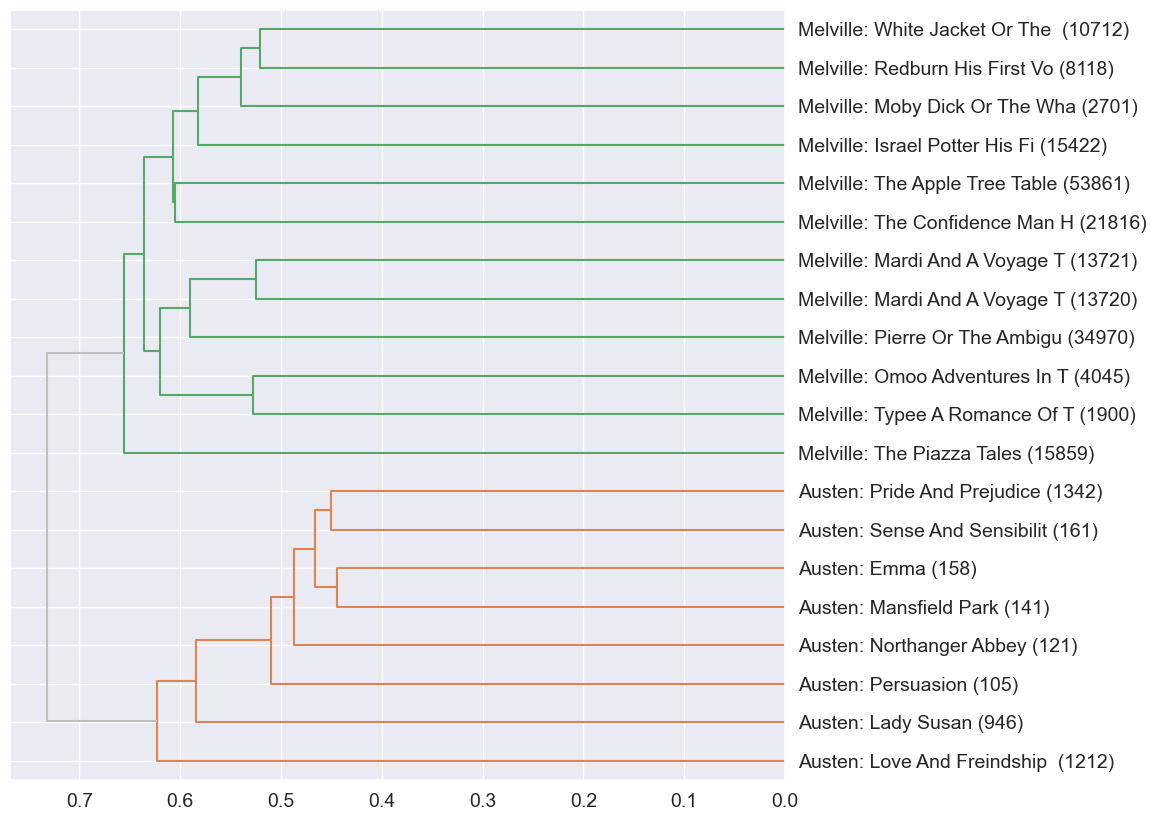

In [36]:
hca(PAIRS.js, color_thresh=.7);

## Questions

What distance measures produce the best results?

## K-Means

K-Means *only* uses Euclidean distance. Why?

* The K-Means procedure does not explicitly use pairwise distances between data points. 
* Instead, it repeatedly assigns points to the closest centroid thereby using Euclidean distance from data points to a centroid. 
* However, K-Means is *implicitly* based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. 
* The term "centroid" is itself from Euclidean geometry. It is multivariate mean in Euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

See the [Cross Validated](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric) post on this.

In [37]:
from sklearn.cluster import KMeans

In [91]:
def get_k_clusters(k=10):
    LIB[f'y_raw_{k}'] = KMeans(k).fit_predict(TFIDF)
    LIB[f'y_L0_{k}'] = KMeans(k).fit_predict(L0)
    LIB[f'y_L1_{k}'] = KMeans(k).fit_predict(L1)
    LIB[f'y_L2_{k}'] = KMeans(k).fit_predict(L2)
    y_cols = [col for col in LIB.columns if 'y_' in col and f'_{k}' in col]
    return LIB.reset_index().set_index('label')[y_cols].sort_values('label').style.background_gradient(colors)

In [92]:
get_k_clusters(2)

,y_raw_2,y_L0_2,y_L1_2,y_L2_2
label,,,,
Austen: Emma (158),0,0,0,0
Austen: Lady Susan (946),0,0,1,0
Austen: Love And Freindship (1212),0,0,0,0
Austen: Mansfield Park (141),0,0,0,0
Austen: Northanger Abbey (121),0,0,0,0
Austen: Persuasion (105),0,0,0,0
Austen: Pride And Prejudice (1342),0,0,0,0
Austen: Sense And Sensibilit (161),0,0,0,0
Melville: Israel Potter His Fi (15422),0,1,0,1


In [93]:
get_k_clusters(4)

,y_raw_4,y_L0_4,y_L1_4,y_L2_4
label,,,,
Austen: Emma (158),1,1,3,1
Austen: Lady Susan (946),1,1,2,1
Austen: Love And Freindship (1212),1,1,1,1
Austen: Mansfield Park (141),1,1,1,1
Austen: Northanger Abbey (121),1,1,3,1
Austen: Persuasion (105),1,1,1,1
Austen: Pride And Prejudice (1342),1,1,3,1
Austen: Sense And Sensibilit (161),1,1,0,1
Melville: Israel Potter His Fi (15422),1,0,1,0


# Correlation

Use Pandas' `df.corr('kendall')` method to generate pairs. 

Correlation is normalized covariance, which is the dot product two vectors.

Kendall’s correlation is non-parametric -- it does not require the two variables have a bell curve distribution.

In [95]:
# corr_type = 'pearson'
corr_type = 'kendall'
# corr_type = 'spearman'

In [96]:
CORR_MATRIX = TFIDF.T.corr(corr_type)

## Compare Correlations by Author

In [97]:
(CORR_MATRIX * 10).astype('int').style.background_gradient(cmap=colors, axis=None)

book_id,105,121,141,158,161,946,1212,1342,1900,2701,4045,8118,10712,13720,13721,15422,15859,21816,34970,53861
book_id,,,,,,,,,,,,,,,,,,,,
105,10,5,5,5,5,4,4,5,3,2,3,3,2,2,2,3,2,3,3,3
121,5,10,5,5,5,4,4,5,3,2,3,3,2,2,2,3,2,3,3,3
141,5,5,10,5,5,4,4,5,3,2,3,3,2,2,2,3,2,3,2,3
158,5,5,5,10,5,4,4,5,3,2,3,3,2,2,2,2,2,3,2,3
161,5,5,5,5,10,4,4,6,3,2,3,3,2,2,2,3,2,3,3,3
946,4,4,4,4,4,10,4,5,3,2,2,2,2,2,1,2,2,2,2,2
1212,4,4,4,4,4,4,10,4,2,2,2,2,2,2,1,2,2,2,2,2
1342,5,5,5,5,6,5,4,10,3,2,3,3,2,2,2,2,2,3,2,3
1900,3,3,3,3,3,3,2,3,10,3,4,3,3,3,2,3,3,3,3,3


In [113]:
SORT = CORR_MATRIX.mean().sort_values(ascending=False).index

In [114]:
(CORR_MATRIX.loc[SORT, SORT] * 10).astype('int').style.background_gradient(cmap=colors, axis=None)

book_id,161,1342,121,105,141,158,1900,946,4045,1212,8118,15422,53861,21816,10712,13720,34970,15859,2701,13721
book_id,,,,,,,,,,,,,,,,,,,,
161,10,6,5,5,5,5,3,4,3,4,3,3,3,3,2,2,3,2,2,2
1342,6,10,5,5,5,5,3,5,3,4,3,2,3,3,2,2,2,2,2,2
121,5,5,10,5,5,5,3,4,3,4,3,3,3,3,2,2,3,2,2,2
105,5,5,5,10,5,5,3,4,3,4,3,3,3,3,2,2,3,2,2,2
141,5,5,5,5,10,5,3,4,3,4,3,3,3,3,2,2,2,2,2,2
158,5,5,5,5,5,10,3,4,3,4,3,2,3,3,2,2,2,2,2,2
1900,3,3,3,3,3,3,10,3,4,2,3,3,3,3,3,3,3,3,3,2
946,4,5,4,4,4,4,3,10,2,4,2,2,2,2,2,2,2,2,2,1
4045,3,3,3,3,3,3,4,2,10,2,3,3,3,3,3,3,2,3,3,2


In [100]:
LIB['kendall_sum'] = CORR_MATRIX.sum()

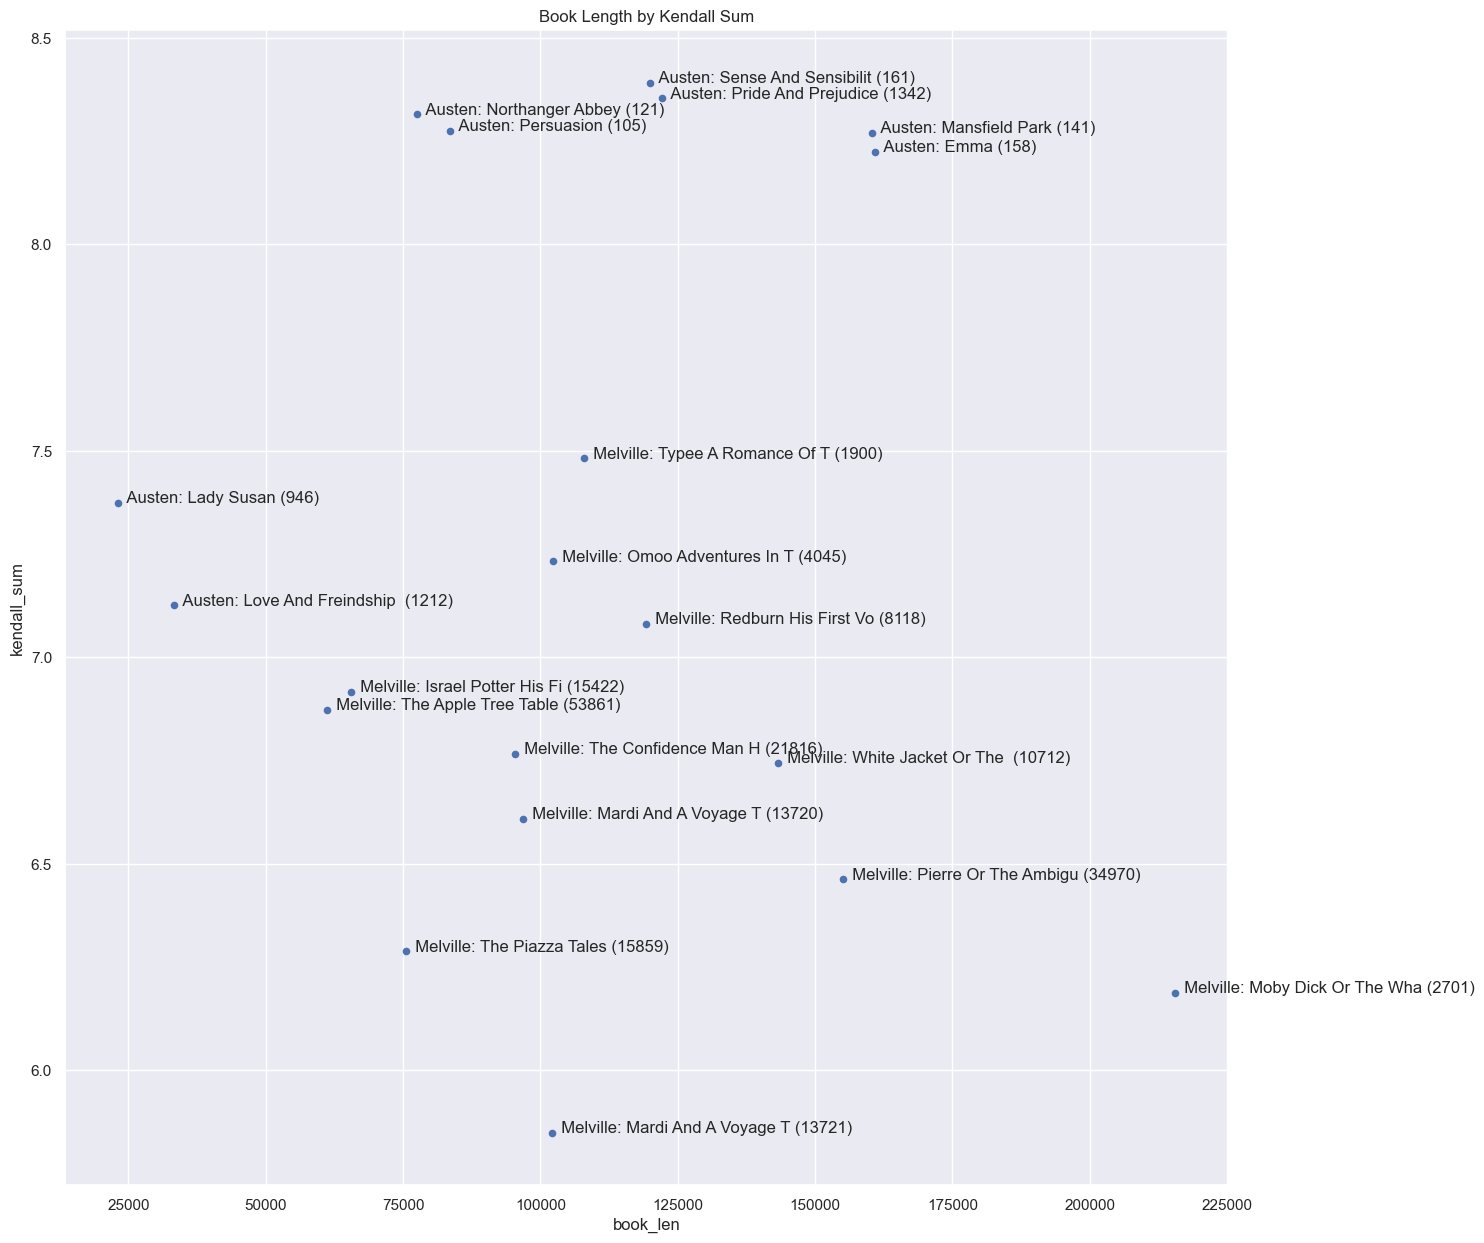

In [101]:
ax = LIB.plot.scatter('book_len', 'kendall_sum', figsize=(15,15), title="Book Length by Kendall Sum")
LIB.apply(lambda row: ax.text(row.book_len, row.kendall_sum, f"  {row.label.title()}"), axis=1);

In [102]:
AUS_IDX = LIB[LIB.author.str.contains("AUS")].index.to_list()
MEL_IDX = LIB[LIB.author.str.contains("MEL")].index.to_list()

In [103]:
CORR_MATRIX.loc[AUS_IDX, AUS_IDX].stack().mean()

0.5775259055307203

In [104]:
CORR_MATRIX.loc[MEL_IDX, MEL_IDX].stack().mean()

0.3688715550847207

## Hierarchical 

In [105]:
CORR = CORR_MATRIX.stack().to_frame(corr_type).sort_index()
CORR.index.names = ['doc_a', 'doc_b']
CORR = CORR.query('doc_a < doc_b')

<Figure size 640x480 with 0 Axes>

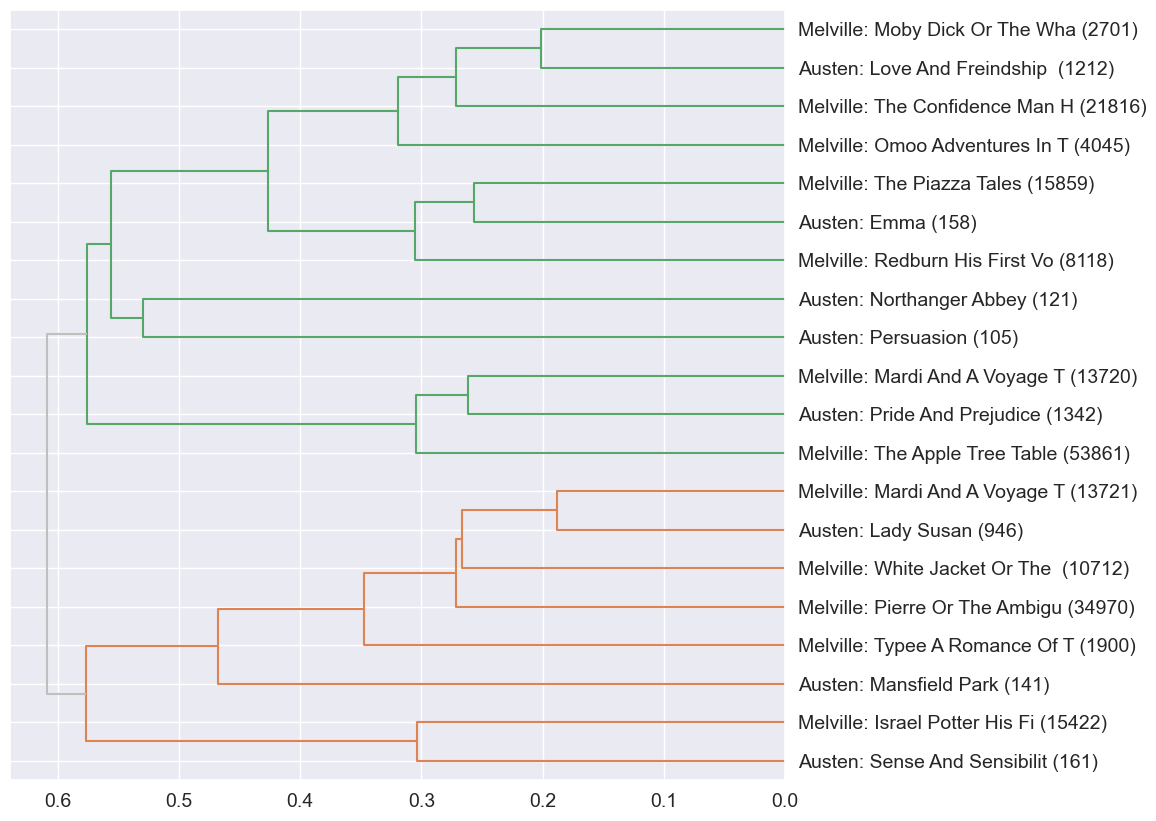

In [106]:
hca(CORR[corr_type], color_thresh=.6);

## Why so bad as clustering?

Correlation is not a distance measure in vector space. 

- It measures the **degree of association** between two variables. 
- It measure the **strength and direction of the relationship** between two variables

So, although both correlation and distance measures concern the relationship between variables, they are fundamentally different concepts and are used for different purposes. 

# Conclusions

* Cosine similarty with Ward Linkage for HAC seems best.
* L2 normalization for K-Means seems best.
* Correlation does not appear useful as a similarity measure for grouping.
* More variance and entropy in Melville compared to Austen.

# Save Work

In [ ]:
TFIDF.to_csv('{}/{}-TFIDF_book.csv'.format(data_out, data_prefix))
CORR.join(PAIRS).to_csv('{}/{}-DOCPAIRS.csv'.format(data_out, data_prefix))